# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [ ]:
# your code here
import pandas as pd 

df = pd.read_csv('tic-tac-toe.csv')
df.tail()

#Convert the categorical values to numeric in all columns.
# Define mapping for 'x', 'o' and 'b' (blank)
mapping = {'x': 1, 'o': -1, 'b': 0}

# Apply mapping to all board position columns
board_columns = ['TL', 'TM', 'TR', 'ML', 'MM', 'MR', 'BL', 'BM', 'BR']
for col in board_columns:
	df[col] = df[col].map(mapping)

df.head()

In [6]:
#1. Separate the inputs and output.
X = df[board_columns]
y = df['class']

In [9]:
#1. Normalize the input data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 1.03516957,  1.10682993,  1.03516957,  1.10682993, -1.24199419,
        -1.2235944 ,  1.03516957, -1.2235944 , -1.23155602],
       [ 1.03516957,  1.10682993,  1.03516957,  1.10682993, -1.24199419,
        -1.2235944 , -1.23155602,  1.10682993, -1.23155602],
       [ 1.03516957,  1.10682993,  1.03516957,  1.10682993, -1.24199419,
        -1.2235944 , -1.23155602, -1.2235944 ,  1.03516957],
       [ 1.03516957,  1.10682993,  1.03516957,  1.10682993, -1.24199419,
        -1.2235944 , -1.23155602, -0.05838224, -0.09819323],
       [ 1.03516957,  1.10682993,  1.03516957,  1.10682993, -1.24199419,
        -1.2235944 , -0.09819323, -1.2235944 , -0.09819323]])

In [10]:

# Use df.head() and df.tail() (if you're using Pandas) to examine the first and last few rows. Look for:


# Find Missing values: Represented as NaN, blanks, or placeholders.
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

#

Missing values in each column:
TL       0
TM       0
TR       0
ML       0
MM       0
MR       0
BL       0
BM       0
BR       0
class    0
dtype: int64


In [11]:
# Check for data types and unique values in each column
print("\nData types and unique values:")
print(df.dtypes)
for col in df.columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in {col}: {unique_values}")





Data types and unique values:
TL       int64
TM       int64
TR       int64
ML       int64
MM       int64
MR       int64
BL       int64
BM       int64
BR       int64
class     bool
dtype: object

Unique values in TL: [ 1 -1  0]

Unique values in TM: [ 1 -1  0]

Unique values in TR: [ 1 -1  0]

Unique values in ML: [ 1 -1  0]

Unique values in MM: [-1  0  1]

Unique values in MR: [-1  0  1]

Unique values in BL: [ 1 -1  0]

Unique values in BM: [-1  1  0]

Unique values in BR: [-1  1  0]

Unique values in class: [ True False]


In [12]:

# Data format inconsistencies: Different date formats, inconsistent capitalization.
# Check for inconsistent capitalization in categorical columns
print("\nInconsistent capitalization:")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"\nUnique values in {col}: {unique_values}")




Inconsistent capitalization:


In [13]:

# Summary Statistics (df.describe()):
# Get a statistical overview: mean, median, standard deviation, min, max, quartiles.
# This helps identify potential outliers or skewed distributions.
print("\nSummary statistics:")
summary_stats = df.describe()
print(summary_stats)



Summary statistics:
               TL          TM          TR          ML          MM          MR  \
count  958.000000  958.000000  958.000000  958.000000  958.000000  958.000000   
mean     0.086639    0.050104    0.086639    0.050104    0.123173    0.050104   
std      0.882791    0.858661    0.882791    0.858661    0.904803    0.858661   
min     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
25%     -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   -1.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               BL          BM          BR  
count  958.000000  958.000000  958.000000  
mean     0.086639    0.050104    0.086639  
std      0.882791    0.858661    0.882791  
min     -1.000000   -1.000000   -1.000000  
25%     -1.000000   -1.000000

In [15]:

# Get a statistical overview: mean, median, standard deviation, min, max, quartiles.

#Unexpected means or medians: Could indicate errors or skewed data.
# mean
df.mean()
# median
df.median()

#Very large or small standard deviations: Might signal high variability or outliers.
# standard deviation
df.std()

# Min/Max values outside the reasonable range: Indicates errors or the need for outlier handling.
# min
df.min()
# max
df.max()
# quartiles
# df.quantile([0.25, 0.5, 0.75])



TL          1
TM          1
TR          1
ML          1
MM          1
MR          1
BL          1
BM          1
BR          1
class    True
dtype: object

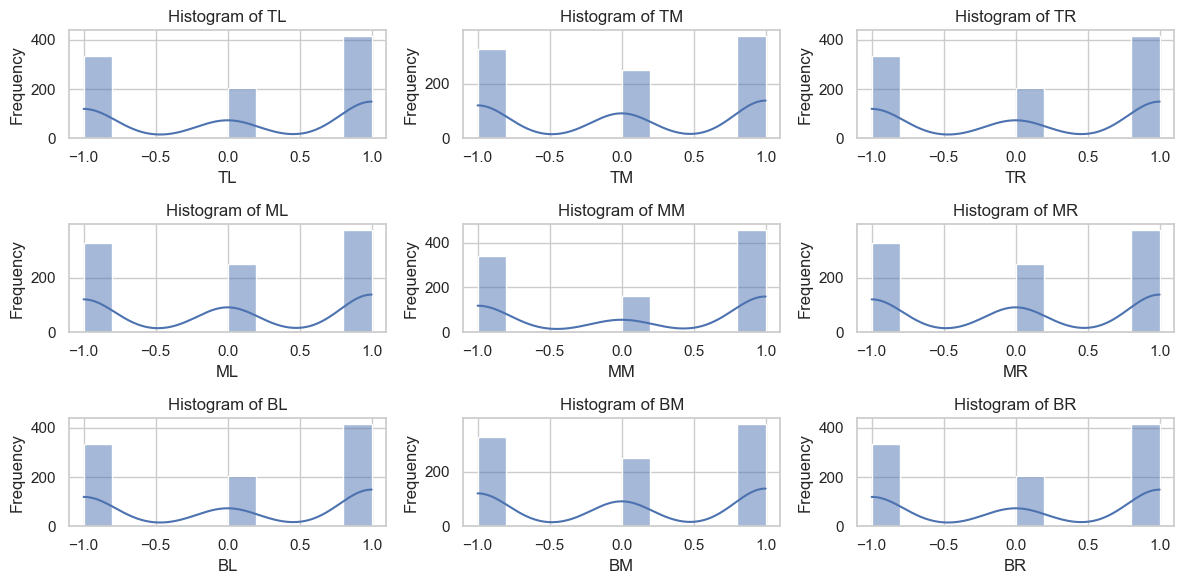

In [18]:

# Data Visualization
# Visualize the data to identify patterns, trends, and anomalies.
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for seaborn
sns.set(style="whitegrid")
# Histograms: Visualize the distribution of individual features. Look for:
# Skewness: Determine if data transformations (e.g., log transformation) are needed.
# Outliers: Identify extreme values.
plt.figure(figsize=(12, 6))
for col in board_columns:
    plt.subplot(3, 3, board_columns.index(col) + 1)
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


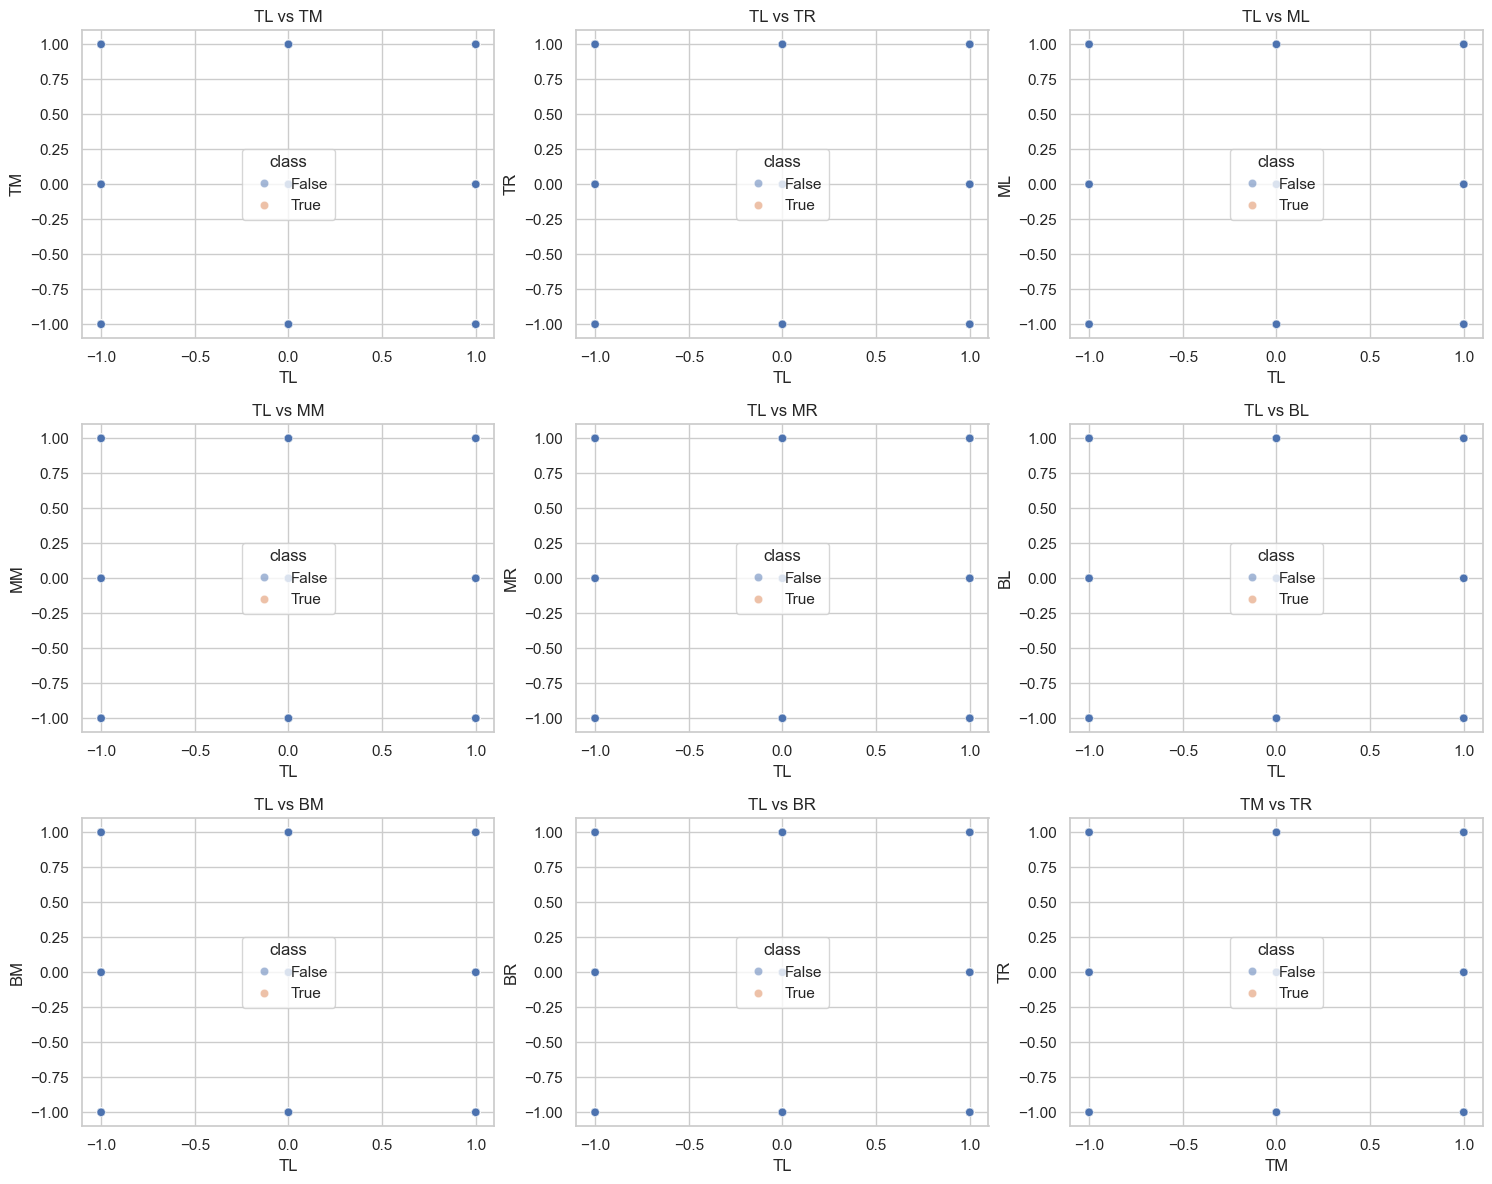

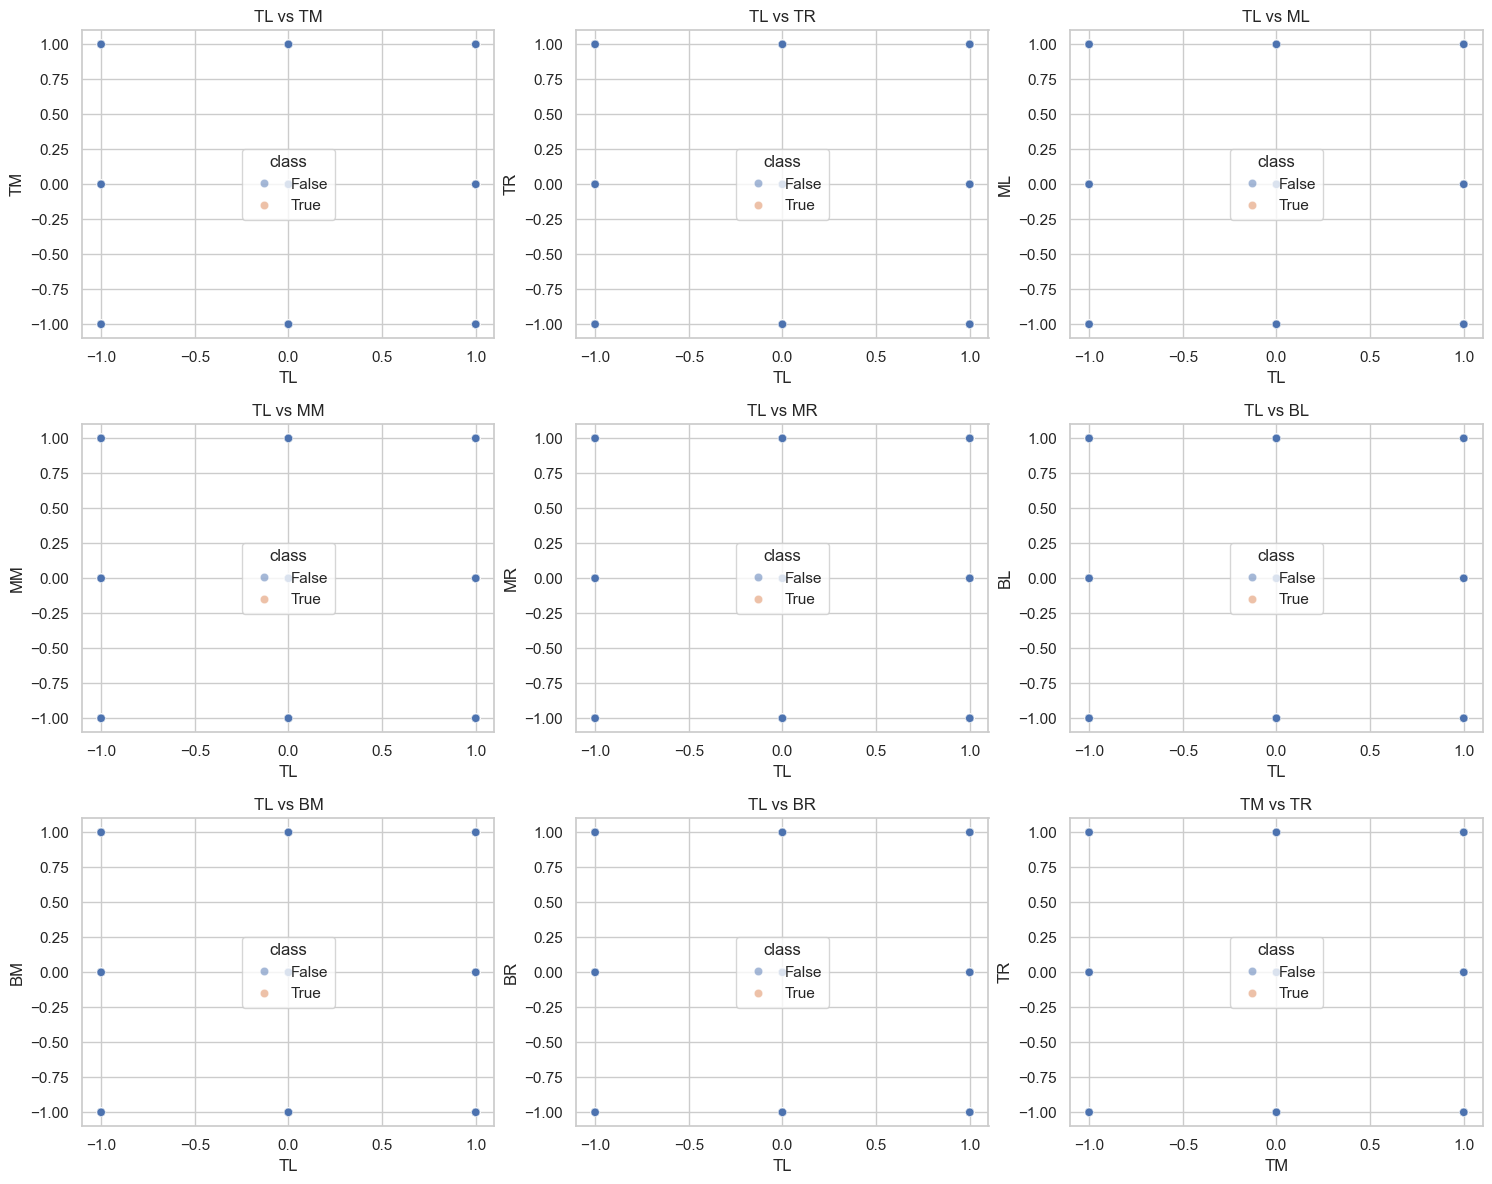

In [27]:
# Create scatter plot grid for pairs of board positions
#
# Since there are 9 columns, we'll create multiple figures
plt.figure(figsize=(15, 12))
plot_count = 1
max_plots = 9

for i in range(len(board_columns)):
    for j in range(i + 1, len(board_columns)):
        if plot_count <= max_plots:
            plt.subplot(3, 3, plot_count)
            sns.scatterplot(data=df, x=board_columns[i], y=board_columns[j], hue='class', alpha=0.5)
            plt.title(f'{board_columns[i]} vs {board_columns[j]}')
            plt.xlabel(board_columns[i])
            plt.ylabel(board_columns[j])
            plot_count += 1
            
plt.tight_layout()
plt.show()

# If we have more pairs to show, create additional figures
if plot_count <= len(board_columns) * (len(board_columns) - 1) / 2:
    plt.figure(figsize=(15, 12))
    new_plot_count = 1
    
    for i in range(len(board_columns)):
        for j in range(i + 1, len(board_columns)):
            if plot_count <= len(board_columns) * (len(board_columns) - 1) / 2:
                if new_plot_count <= max_plots:
                    plt.subplot(3, 3, new_plot_count)
                    sns.scatterplot(data=df, x=board_columns[i], y=board_columns[j], hue='class', alpha=0.5)
                    plt.title(f'{board_columns[i]} vs {board_columns[j]}')
                    plt.xlabel(board_columns[i])
                    plt.ylabel(board_columns[j])
                    new_plot_count += 1
                plot_count += 1
    
    plt.tight_layout()
    plt.show()


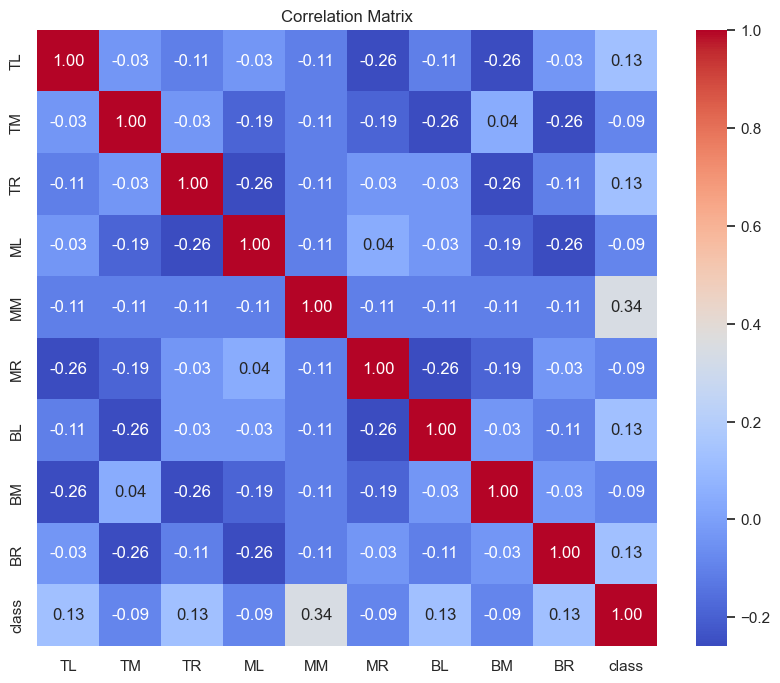

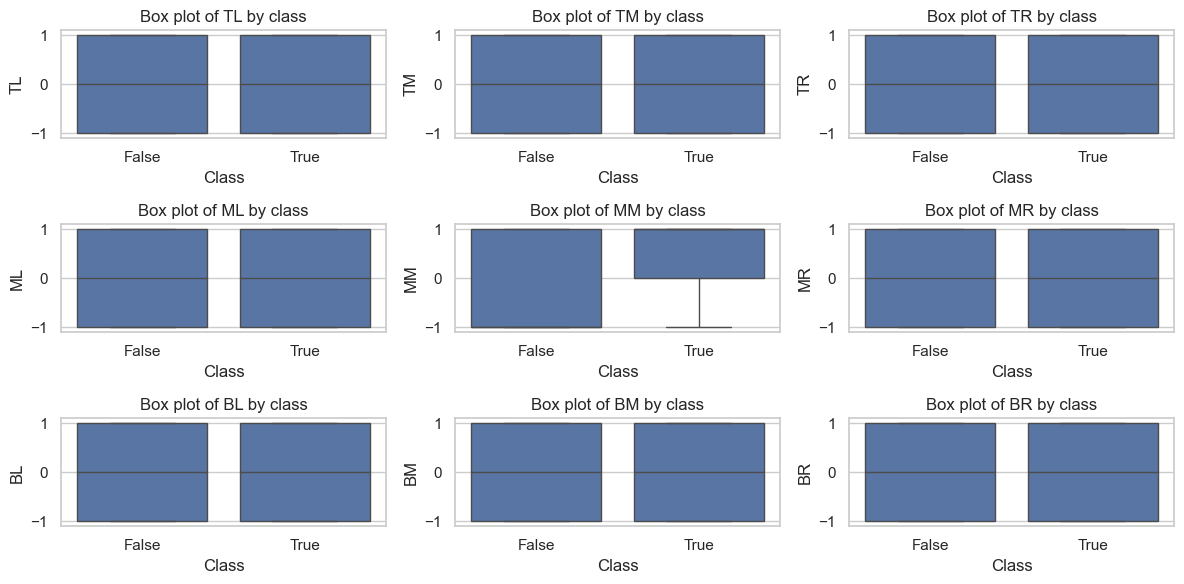

In [21]:


# Correlations: Positive, negative, or no correlation.
# Correlation matrix: Identify relationships between features.
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Clusters: Identify potential groupings within the data.
# Clustering algorithms (e.g., KMeans, DBSCAN) can be applied to find clusters.
# Box plots: Visualize the distribution of features and identify outliers more clearly.
plt.figure(figsize=(12, 6))
for col in board_columns:
    plt.subplot(3, 3, board_columns.index(col) + 1)
    sns.boxplot(data=df, x='class', y=col)
    plt.title(f'Box plot of {col} by class')
    plt.xlabel('Class')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,282 (12.82 KB)

 Trainable params: 3,282 (12.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5608 - loss: 0.6698 - val_accuracy: 0.6823 - val_loss: 0.6085
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7156 - loss: 0.5796 - val_accuracy: 0.7188 - val_loss: 0.5613
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7547 - loss: 0.5263 - val_accuracy: 0.7448 - val_loss: 0.5244
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7813 - loss: 0.4968 - val_accuracy: 0.7552 - val_loss: 0.4906
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7709 - loss: 0.4601 - val_accuracy: 0.7917 - val_loss: 0.4470
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.3929 - val_accuracy: 0.8385 - val_loss: 0.3868
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8654 - loss: 0.3416 - val_accuracy: 0.9010 - val_loss: 0.3031
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9331 - loss: 0.2617 - val_accuracy: 0.9583 - val_loss:

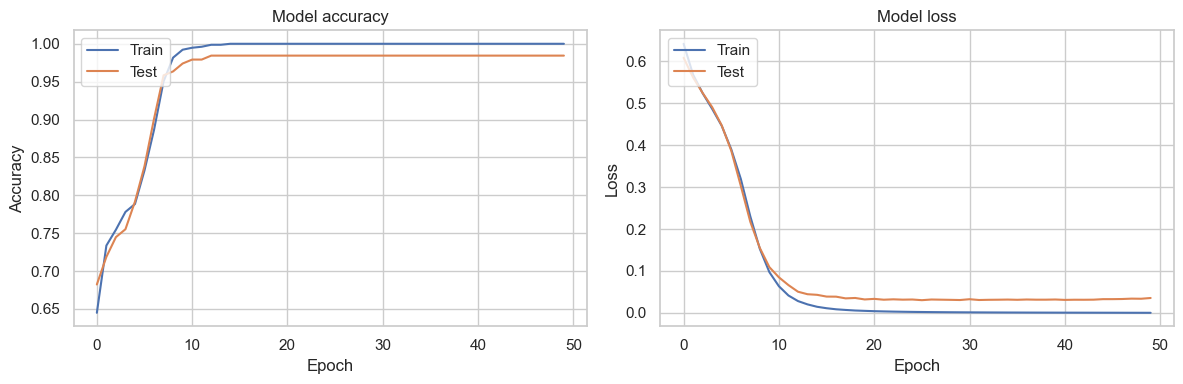

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Install tensorflow if not already available
%pip install tensorflow

# Import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

# Create a Sequential model
model = keras.Sequential([
	keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
	keras.layers.Dense(32, activation='relu'),
	keras.layers.Dense(16, activation='relu'),
	keras.layers.Dense(2, activation='softmax')  # 2 outputs for True/False
])

# Compile the model
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

# Print model summary
model.summary()

# Convert boolean y values to integers (0 or 1) for sparse_categorical_crossentropy
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

# Train the model
history = model.fit(
	X_train, y_train_int,
	epochs=50,
	batch_size=32,
	validation_data=(X_test, y_test_int),
	verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_int)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Save the model
model.save('tic-tac-toe.keras')

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [ ]:
# Load the saved model
loaded_model = keras.models.load_model('tic-tac-toe.keras')
# Make predictions on the test set
predictions = loaded_model.predict(X_test)
# Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1).numpy()
# Compare with actual classes
comparison = pd.DataFrame({'Actual': y_test_int, 'Predicted': predicted_classes})
print(comparison.head(10))  # Display the first 10 predictions
# Check the accuracy of the predictions
accuracy = (predicted_classes == y_test_int).mean()
print(f"Prediction accuracy: {accuracy:.2%}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
     Actual  Predicted
836       0          0
477       1          1
350       1          1
891       0          0
855       0          0
261       1          1
215       1          1
334       1          1
86        1          1
876       0          0
Prediction accuracy: 98.44%


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [41]:
# add a new layer to the model

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, activation='softmax')  # 2 outputs for True/False
])

#adjust the learning rate
from tensorflow.keras.optimizers import Adam
# Create an Adam optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.0002)  # Adjust the learning rate as needed
# Compile the model with the new optimizer
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
#modify the fit method
history = model.fit(
    X_train, y_train_int,
    epochs=100,  # Increase the number of epochs
    batch_size=32,
    validation_data=(X_test, y_test_int),
    verbose=1
)
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_int)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")
# Save the updated model
model.save('tic-tac-toe_updated.keras')
# Load the updated model
loaded_model = keras.models.load_model('tic-tac-toe_updated.keras')
# Make predictions on the test set
predictions = loaded_model.predict(X_test)
# Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=1).numpy()
# Compare with actual classes
comparison = pd.DataFrame({'Actual': y_test_int, 'Predicted': predicted_classes})
print(comparison.head(10))  # Display the first 10 predictions
# Check the accuracy of the predictions
accuracy = (predicted_classes == y_test_int).mean()
print(f"Prediction accuracy: {accuracy:.2%}")



Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3913 - loss: 0.7496 - val_accuracy: 0.5885 - val_loss: 0.6789
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6195 - loss: 0.6720 - val_accuracy: 0.6875 - val_loss: 0.6397
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.6280 - val_accuracy: 0.6875 - val_loss: 0.6197
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.6044 - val_accuracy: 0.6771 - val_loss: 0.6028
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7266 - loss: 0.5701 - val_accuracy: 0.7135 - val_loss: 0.5859
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7618 - loss: 0.5459 - val_accuracy: 0.7240 - val_loss: 0.5674
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7411 - loss: 0.5398 - val_accuracy: 0.7396 - val_loss: 0.5507
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7551 - loss: 0.5208 - val_accuracy: 0.7448 - val_loss: 0.5

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# I added 2 more layers and it increases less than 1% accuracy, but the accuracy was already high with 98%.
'''
1)
learning_rate=0.0001
Result:

Adding "Dense(8, activation='relu')" didn't affect the accuracy. 0% (98.44%)
Adding "Dense(128, activation='relu')" increased accuracy in almost 1% (but some times it decreased).
# The accuracy was already high with 98%.

2)
learning_rate=0.0005
Result:
100%

3)
learning_rate=0.0002
and removed "Dense(128, activation='relu')"
Result:
99.48%

'''